In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np
n = [5,10,20,40,80,160,320,640,1280,5120,10240,20480,40980,81920,163840,327680,655360,1310720,2621440]
alpha = 1

In [55]:
def createHatG(N,k,alpha):
    hatg_array= [0]*N
    for index in range(0,len(hatg_array)):
        if index%k < alpha:
            hatg_array[index]=1
    hatg_array[N-1]=1
    return hatg_array

In [56]:
def createG(N,k,alpha):
    g_array= [0]*N
    for index in range(0,len(g_array)):
        if index%(k) >= (k-alpha):
            g_array[index]=1
    return g_array

In [57]:
def findRootBG(B_2,Good):
    Good = [x+1 for x in Good]
    ar1 = np.array(B_2)
    ar2 = np.array(Good)
    ar3 = np.sqrt(ar1 * ar2)
    return np.add(ar3,Good)

In [58]:
def calculateCost(hatg_array,g_array,gamma):
    i = 0
    algoCost = 0
    index = 1
    badCost = 0
    count_bad = 0
    for job in g_array:
        if job == 1 and hatg_array[i] == 0:
            algoCost = algoCost+pow(index,gamma)
            index = index+1
            
        elif job == 1 and hatg_array[i] == 1:
            algoCost = algoCost+pow(index,gamma)
            index=1
            
        elif job == 0 and hatg_array[i] == 1:
            badCost=badCost+pow(index,gamma)
            index = 1
            
        else:
            badCost=badCost+pow(index,gamma)
            index=index+1        
        i = i+1
        
    for job in g_array:
        if job == 0:
            count_bad = count_bad+1
    algoCost = algoCost+count_bad
    
    return algoCost, badCost

In [59]:
def makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,root):
    
    plt.loglog(B_1,A_1,'red',marker='.')
    plt.loglog(B_2,A_2,'teal',marker='o')
    plt.loglog(B_3,A_3,'orange',marker='s')
    plt.loglog(B_4,A_4,'black',marker='*')
    plt.loglog(B_2,root,'green',marker='v')

    plt.axline([10^3, 10^3], [10^5, 10^5],linestyle ='--')

    plt.legend(['gamma=0','gamma=1','gamma=0.5','gamma=2','A=\sqrt{Bg}+g','A=B'])
    plt.xlabel('Bad cost')
    plt.ylabel('Algorithm cost')
    plt.title('Simulation for alpha = 1')
    plt.show()

In [60]:
def LCharge_Simulate():
    gamma=[0,1,0.5,2]
    A_1=[0]*(len(n))
    B_1=[0]*(len(n))
    A_2=[0]*(len(n))
    B_2=[0]*(len(n))
    A_3=[0]*(len(n))
    B_3=[0]*(len(n))
    A_4=[0]*(len(n))
    B_4=[0]*(len(n))
    Good=[1]*(len(n))
    for g in gamma:
        print('Current gamma fixed to = ',g)
        i=0
        for N in n:
            result=[]
            hatg_array = createHatG(N,N,alpha)
            g_array = createG(N,N,alpha)
            print('Experiment with',N, 'jobs')
            result = calculateCost(hatg_array,g_array,g)
            if g==gamma[0]:
                A_1[i] = result[0]
                B_1[i] = result[1]
            if g==gamma[1]:
                A_2[i] = result[0]
                B_2[i] = result[1]
            if g==gamma[2]:
                A_3[i] = result[0]
                B_3[i] = result[1]
            if g==gamma[3]:
                A_4[i] = result[0]
                B_4[i] = result[1]
            i=i+1
    print('A_1:',A_1)
    print('B_1:',B_1)
    print('A_2:',A_2)
    print('B_2:',B_2)
    print('A_3:',A_3)
    print('B_3:',B_3)
    print('A_4:',A_4)
    print('B_4:',B_4)
    root = findRootBG(B_2,Good)
    print('Root BG',root)
    makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,root)

Current gamma fixed to =  0
Experiment with 5 jobs
Experiment with 10 jobs
Experiment with 20 jobs
Experiment with 40 jobs
Experiment with 80 jobs
Experiment with 160 jobs
Experiment with 320 jobs
Experiment with 640 jobs
Experiment with 1280 jobs
Experiment with 5120 jobs
Experiment with 10240 jobs
Experiment with 20480 jobs
Experiment with 40980 jobs
Experiment with 81920 jobs
Experiment with 163840 jobs
Experiment with 327680 jobs
Experiment with 655360 jobs
Experiment with 1310720 jobs
Experiment with 2621440 jobs
Current gamma fixed to =  1
Experiment with 5 jobs
Experiment with 10 jobs
Experiment with 20 jobs
Experiment with 40 jobs
Experiment with 80 jobs
Experiment with 160 jobs
Experiment with 320 jobs
Experiment with 640 jobs
Experiment with 1280 jobs
Experiment with 5120 jobs
Experiment with 10240 jobs
Experiment with 20480 jobs
Experiment with 40980 jobs
Experiment with 81920 jobs
Experiment with 163840 jobs
Experiment with 327680 jobs
Experiment with 655360 jobs
Experiment

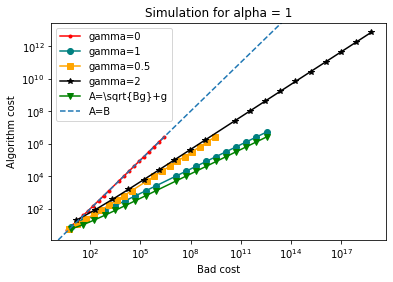

In [61]:
LCharge_Simulate()

In [63]:
def createG(N,k,alpha):
    g_array= [0]*N
    for index in range(0,len(g_array)):
        if index%(k) >= (k-alpha):
            g_array[index]=1
    return g_array


In [64]:
createG(5,5,1)

[0, 0, 0, 0, 1]

In [65]:
def createHatG(N,k,alpha):
    hatg_array= [0]*N
    for index in range(0,len(hatg_array)):
        if index%k < alpha:
            hatg_array[index]=1
    for index in range(0,len(hatg_array)):
        if index%k == (k-1):
            hatg_array[index]=1
    return hatg_array

In [67]:
createHatG(8,8,2)

[1, 1, 0, 0, 0, 0, 0, 1]